In [2]:
from numba import jit
import matplotlib.pyplot as plt
import numpy as np
import math

In [11]:

def calculate_pi_collisions(n_digits):
    # Mass ratio: m2/m1 = 100^(n-1)
    m1 = 1  # Mass of the first ball
    m2 = 100**(n_digits - 1)  # Mass of the second ball. for 100,000,000 takes 1 min to run.

    # Initial velocities
    v1 = 0  # Ball 1 starts stationary
    v2 = -5  # Ball 2 moves toward Ball 1
    collisions = 0  # Count collisions
    x = []
    y = []

    while True:
        # Check for collision between the balls
        if v2 < v1:
            collisions += 1
            # Update velocities using elastic collision formulas
            new_v1 = ((m1 - m2) / (m1 + m2)) * v1 + (2 * m2 / (m1 + m2)) * v2
            new_v2 = ((m2 - m1) / (m1 + m2)) * v2 + (2 * m1 / (m1 + m2)) * v1
            v1, v2 = new_v1, new_v2

        # Check for collision with the wall (Ball 1 hitting wall)
        if v1 < 0:
            collisions += 1
            v1 = -v1  # Reverse velocity of Ball 1

        # Stop if Ball 2 is moving away from Ball 1
        if v2 >= v1:
            break

    return collisions


# Example: Calculate π to 3 digits
number = 7

# Loop from 1 to numbers 
for n_digits in range(1, numbers + 1): 
    pi_collisions = calculate_pi_collisions(n_digits)
    print(f"Number of digits: {n_digits}, Number of collisions: {pi_collisions}")



Number of digits: 1, Number of collisions: 3
Number of digits: 2, Number of collisions: 31
Number of digits: 3, Number of collisions: 314
Number of digits: 4, Number of collisions: 3141
Number of digits: 5, Number of collisions: 31415
Number of digits: 6, Number of collisions: 314159
Number of digits: 7, Number of collisions: 3141592
Number of digits: 8, Number of collisions: 31415926


KeyboardInterrupt: 

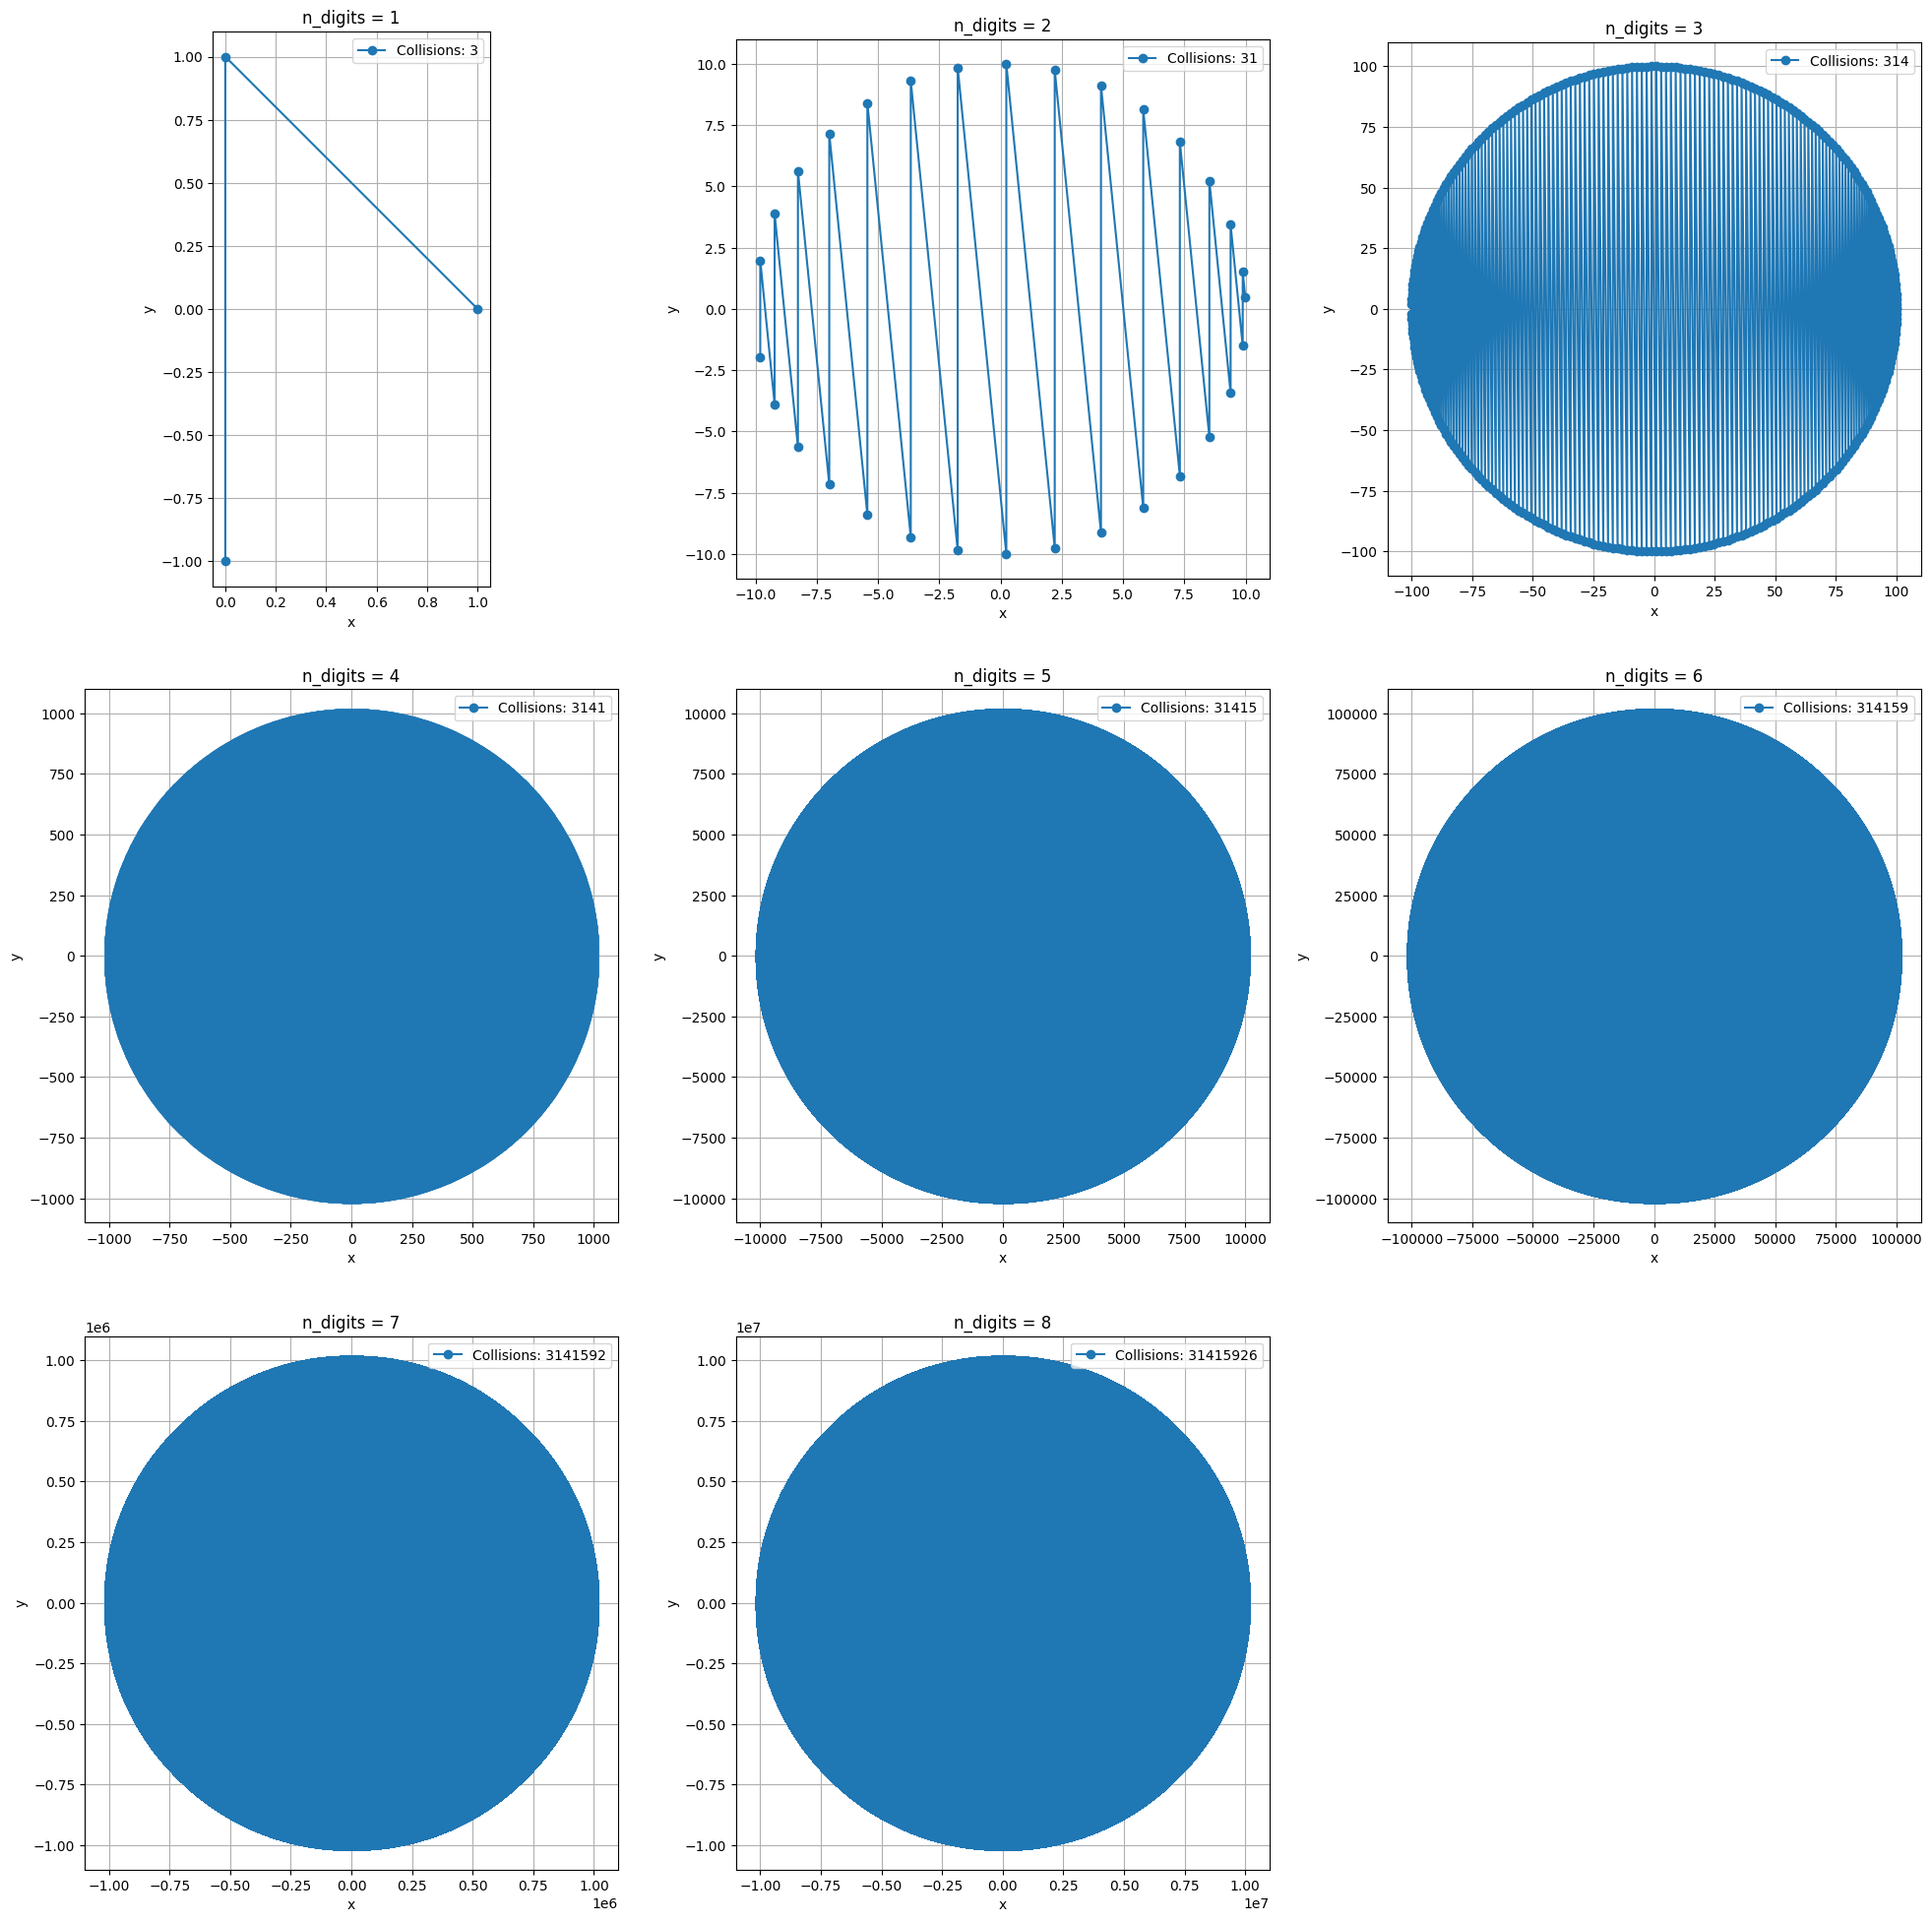

In [12]:
pow_ten = 100

def calculate_pi_collisions(n_digits):
    m1 = 1
    m2 = pow_ten**(n_digits - 1)
    v1 = 0
    v2 = -1
    collisions = 0
    x_values = []
    y_values = []

    # for calculating the new v1
    ratio_1 = (m1 - m2) / (m1 + m2)
    ratio_2 = 2 * m2 / (m1 + m2)

    # for calculating the new v2
    ratio_3 = (m2 - m1) / (m1 + m2)
    ratio_4 = 2 * m1 / (m1 + m2)

    m2_sqrt = np.sqrt(m2)
    m1_sqrt = np.sqrt(m1)

    while True:
        if v2 < v1:
            collisions += 1
            new_v1 = ratio_1 * v1 + ratio_2 * v2
            new_v2 = ratio_3 * v2 + ratio_4 * v1
            v1, v2 = new_v1, new_v2
            y_values.append(m1_sqrt * v1)
            x_values.append(m2_sqrt * v2)
        if v1 < 0:
            collisions += 1
            v1 = -v1
            y_values.append(m1_sqrt * v1)
            x_values.append(m2_sqrt * v2)
        if v2 >= v1:
            break

    return collisions, x_values, y_values

# Create the figure with gridspec
fig = plt.figure(figsize=(20, 20))  # Fixed figure size
gs = fig.add_gridspec(3, 3)  # 3x3 grid of subplots (adjust the size here)

# Loop over n_digits to plot each subplot
for n_digits in range(1, 9):  # Loop through n_digits values 1 to 9
    pi_collisions, x_values, y_values = calculate_pi_collisions(n_digits)
    
    # Get the row and column for each subplot
    row = (n_digits - 1) // 3
    col = (n_digits - 1) % 3
    
    # Create the subplot in the specified grid location
    ax = fig.add_subplot(gs[row, col])
    
    # Plot the results
    ax.plot(x_values, y_values, marker='o', label=f"Collisions: {pi_collisions}")
    ax.set_title(f"n_digits = {n_digits}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc = "upper right")
    ax.grid(True)
    
    # Set the aspect ratio to 'equal' so that circles look correct
    ax.set_aspect('equal', adjustable='box')

# Adjust layout to prevent overlap
plt.tight_layout(pad=2.0)

# Display the plot
plt.show()

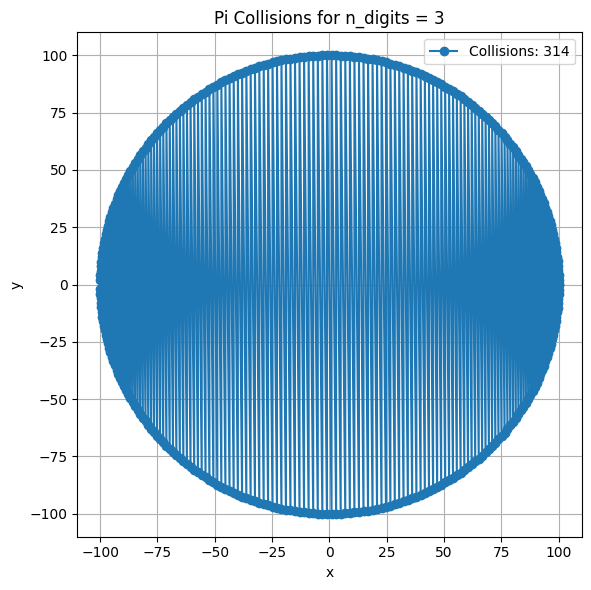

In [9]:
from numba import jit
import matplotlib.pyplot as plt
import numpy as np
import math

pow_ten = 100

def calculate_pi_collisions(n_digits):
    m1 = 1
    m2 = pow_ten**(n_digits - 1)
    v1 = 0
    v2 = -1
    collisions = 0
    x_values = []
    y_values = []

    # for calculating the new v1
    ratio_1 = (m1 - m2) / (m1 + m2)
    ratio_2 = 2 * m2 / (m1 + m2)

    # for calculating the new v2
    ratio_3 = (m2 - m1) / (m1 + m2)
    ratio_4 = 2 * m1 / (m1 + m2)

    m2_sqrt = np.sqrt(m2)
    m1_sqrt = np.sqrt(m1)

    while True:
        if v2 < v1:
            collisions += 1
            new_v1 = ratio_1 * v1 + ratio_2 * v2
            new_v2 = ratio_3 * v2 + ratio_4 * v1
            v1, v2 = new_v1, new_v2
            y_values.append(m1_sqrt * v1)
            x_values.append(m2_sqrt * v2)
        if v1 < 0:
            collisions += 1
            v1 = -v1
            y_values.append(m1_sqrt * v1)
            x_values.append(m2_sqrt * v2)
        if v2 >= v1:
            break

    return collisions, x_values, y_values

# Choose a single value for n_digits (e.g., n_digits = 5)
n_digits = 3
pi_collisions, x_values, y_values = calculate_pi_collisions(n_digits)

# Create a single plot
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', label=f"Collisions: {pi_collisions}")
plt.title(f"Pi Collisions for n_digits = {n_digits}")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="upper right")
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')  # Make sure circles look correct

# Display the plot
plt.tight_layout()
plt.show()